# Linear Regression

## Introduction
- **Linear Regression** is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. 
    - It’s used to predict values within a **continuous** range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).
- The hypothesis of linear regression is:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1 $$

- where
    - $x$ represents our input data and $ h_\theta(x)$ (or $\mathbf{\hat{y}}$) represents our prediction.
    - $\theta_0$  and $\theta_1$ are the variables our algorithm will try to "learn" to produce the most accurate predictions. 

In [41]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=4
)
X = np.hstack((np.ones((X.shape[0], 1)), X)) # add '1' column into X
y = y.reshape(-1, 1)

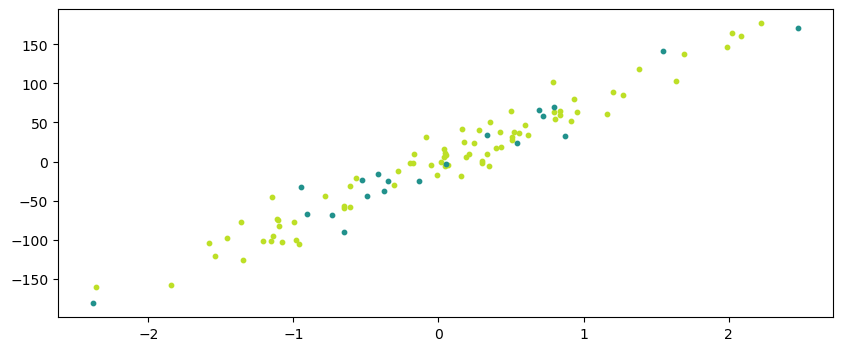

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2024
)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(10, 4))
m1 = plt.scatter(X_train[:,1], y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test[:,1], y_test, color=cmap(0.5), s=10)
plt.show()

### Cost Function
- The cost function in linear regression is the compass guiding us to optimal model performance. 
- It quantifies the error between predicted and actual values, with the squared error averaged across training examples.
- In machine learning, various cost functions exist for different applications, but the **squared error** cost function is a favorite for linear regression due to its effectiveness.
- **Goal**: to minimize the cost function (Mean Square Error - MSE)     
    - $\theta_0$  and $\theta_1$ are parameters adjusted simultaneously during training to minimize this function. 

$$ J(\theta_0,\theta_1) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

- Where:
    - $m$ is the total number of observations (data points)
    - $\frac{1}{m} \sum_{i=1}^{m}$ is the mean
    - $y^{(i)}$ is the actual value of an observation and $h_\theta(x^{(i)})$ is our prediction



- Computing Cost Function $J(\theta_0,\theta_1)$

In [43]:
def compute_cost_one_variable(X, y, theta):
    """_summary_

    Args:
        X: (m, 2)
        y: (m, 1)
        theta: (2, 1)

    Returns:
        J: cost 
    """
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [44]:
theta = [[-1],[2]]
J = compute_cost_one_variable(X_train, y_train, theta)
print(f'With theta = {theta}\nCost computed = {J}')

With theta = [[-1], [2]]
Cost computed = 2612.566225269136


In [45]:
theta = [[0],[0]]
J = compute_cost_one_variable(X_train, y_train, theta)
print(f'With theta = {theta}\nCost computed = {J}')

With theta = [[0], [0]]
Cost computed = 2746.401965148764



### Gradient Descents
- Consider the 3-dimensional graph below in the context of a cost function. 
- Our goal is to move from the mountain in the top right corner (high cost) to the dark blue sea in the bottom left (low cost).
- The arrows represent the direction of steepest descent (negative gradient) from any given point–the direction that decreases the cost function as quickly as possible.

<p align="center"><img width=250 src="../../../assets/img/gradient_descent_3d.png" />
<img width=300 src="../../../assets/img/gradient_descent.png" />
</p>

- The gradient is defined as:

$$\frac \partial {\partial\theta_0}J(\theta_0,\theta_1) = \frac 1 m \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})$$ 
$$\frac \partial {\partial\theta_1}J(\theta_0,\theta_1) = \frac 1 m \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})*x_1^{(i)}$$

- To minimize the cost of $J(\theta_0,\theta_1)$ we will use the batch gradient descent algorithm. 
    - In batch gradient descent, each iteration performs the update with all the training examples
    - Note: parameters $\theta_0$, $\theta_1$ are updated simultaneously. 

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \theta_0 &= \theta_0 -  \alpha \frac{\partial J(\theta_0,\theta_1)}{\partial \theta_0} \tag{3}  \; \newline 
 \theta_1 &= \theta_1 -  \alpha \frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1}  \newline \rbrace
\end{align*}$$

OR
$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$
- Where:
    - $j=0,1$
    - $\alpha$ is the learning rate (the steps to update J)
        - Learning rate to small: slow gradient descent
        - Learning rate to large: gradient descent can overshoot the minimum, may fail to converge


In [46]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y
        # compute gradient
        delta = (1/m) * (diff_hy.T.dot(X))
        # update theta
        theta = theta - (alpha * delta.T)
        # compute the loss
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

In [47]:
iterations = 1500
alpha = 0.01

theta, J_hist = gradient_descent(X, y, theta, alpha, iterations)
print(f'Theta found by gradient descent:\n{theta}')


Theta found by gradient descent:
[[-0.43213348]
 [74.93345968]]


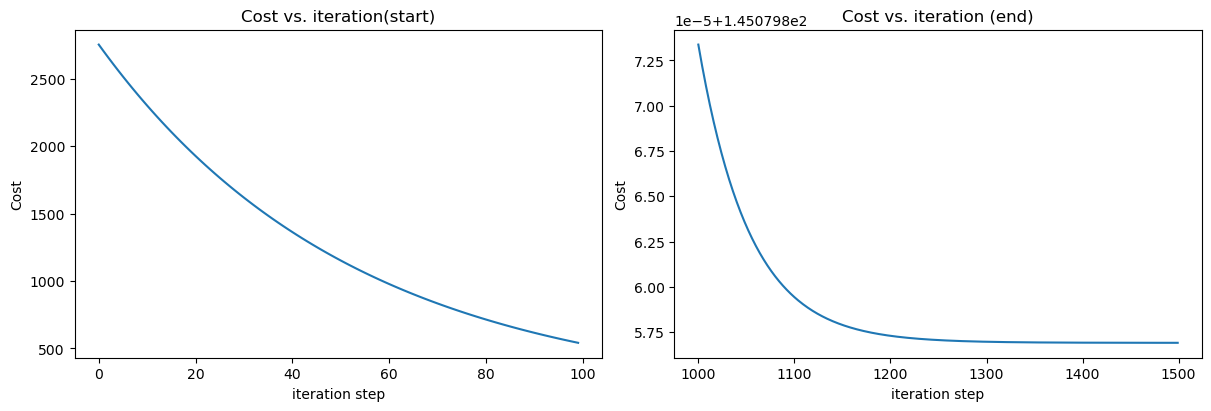

In [48]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])

ax1.set(ylabel='Cost', xlabel='iteration step', title="Cost vs. iteration(start)")            
ax2.set(ylabel='Cost', xlabel='iteration step', title="Cost vs. iteration (end)")  
plt.show()

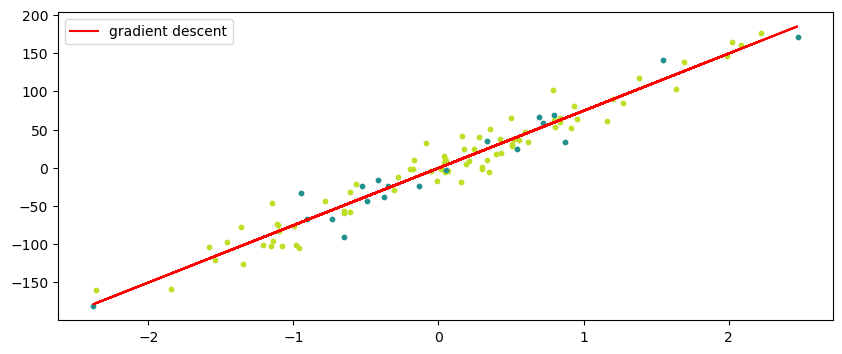

In [65]:
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(10, 4))
m1 = plt.scatter(X_train[:,1], y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test[:,1], y_test, color=cmap(0.5), s=10)

plt.plot(X[:,1], X.dot(theta), color='r', label='gradient descent')

plt.legend()
plt.show()

## Normal Equations

A closed-form solution to find $\theta$ without iteration.

$$\theta = (X^TX)^{-1}X^Ty$$

In [50]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [54]:
n_theta = normal_eqn(X_train, y_train)

In [67]:
n_theta

array([[-0.25355729],
       [75.02852289]])

## Scikit-Learn

In [68]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(array([-0.25355729]), array([[ 0.        , 75.02852289]]))